In [96]:
import pandas as pd
import tensorflow as tf
import math
import numpy as np

In [97]:
data = pd.read_csv('data.csv')

In [98]:
data.head()

,Google Position,CTR,Source
0,1,0.364,Optify
1,2,0.125,Optify
2,3,0.095,Optify
3,4,0.079,Optify
4,5,0.061,Optify


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
Google Position    30 non-null int64
CTR                30 non-null float64
Source             30 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 800.0+ bytes


In [100]:
optify_data = data[data['Source']=='Optify']

In [101]:
optify_data

,Google Position,CTR,Source
0,1,0.364,Optify
1,2,0.125,Optify
2,3,0.095,Optify
3,4,0.079,Optify
4,5,0.061,Optify
5,6,0.041,Optify
6,7,0.038,Optify
7,8,0.035,Optify
8,9,0.030,Optify
9,10,0.022,Optify


In [102]:
x_data = optify_data['Google Position'].apply(np.log10).values
y_data = optify_data['CTR'].apply(np.log10).values

In [103]:
x_data

array([ 0.        ,  0.30103   ,  0.47712125,  0.60205999,  0.69897   ,
        0.77815125,  0.84509804,  0.90308999,  0.95424251,  1.        ,
        1.04139269,  1.07918125,  1.11394335,  1.14612804,  1.17609126,
        1.20411998,  1.23044892,  1.25527251,  1.2787536 ,  1.30103   ])

In [104]:
import matplotlib.pyplot as plt

In [105]:
%matplotlib inline

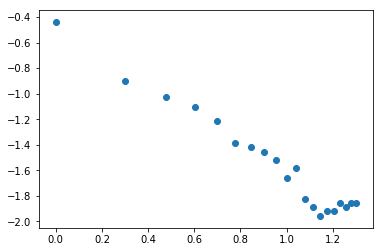

In [106]:
plt.scatter(x_data, y_data)

In [107]:
## Create tensorflow structure
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

In [108]:
x_data

array([ 0.        ,  0.30103   ,  0.47712125,  0.60205999,  0.69897   ,
        0.77815125,  0.84509804,  0.90308999,  0.95424251,  1.        ,
        1.04139269,  1.07918125,  1.11394335,  1.14612804,  1.17609126,
        1.20411998,  1.23044892,  1.25527251,  1.2787536 ,  1.30103   ])

In [109]:
y_data

array([-0.43889862, -0.90308999, -1.02227639, -1.10237291, -1.21467016,
       -1.38721614, -1.4202164 , -1.45593196, -1.52287875, -1.65757732,
       -1.58502665, -1.82390874, -1.88605665, -1.95860731, -1.92081875,
       -1.92081875, -1.85387196, -1.88605665, -1.85387196, -1.85387196])

In [110]:
y = Weights * x_data + biases
loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [111]:
sess = tf.Session()

In [112]:
sess.run(init)

In [113]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))

0 [-1.54618359] [-1.56087923]
20 [-1.15719104] [-0.65385783]
40 [-1.14726424] [-0.50263709]
60 [-1.15671742] [-0.47326228]
80 [-1.16085541] [-0.46669358]
100 [-1.16219032] [-0.46507144]
120 [-1.16258311] [-0.46464723]
140 [-1.16269469] [-0.46453279]
160 [-1.16272593] [-0.46450159]
180 [-1.16273463] [-0.46449301]
200 [-1.16273689] [-0.46449071]


In [114]:
sess.run(Weights)

array([-1.16273689], dtype=float32)

In [115]:
type(optify_data)

pandas.core.frame.DataFrame

In [116]:
sess.close()